In [1]:
%pylab inline
import pickle
from importlib import reload
plt.style.use("default")

Populating the interactive namespace from numpy and matplotlib


In [2]:
from run_decoding_ppi import get_input_file_name, get_collection_file_name

In [3]:
which_conc = "100"
dataset    = "gamp5"
results_file = get_collection_file_name(dataset, which_conc)
print(f"{results_file=}")
with open(results_file, "rb") as f:
    results = pickle.load(f)
perfs = results["perfs"]
sizes = results["sizes"]

results_file='/camp/lab/schaefera/working/tootoos/git/crick-osn-model-release/data/decoding-ppi/gamp5_conc100/output.collected.p'


In [4]:
perf_mean = mean(perfs,axis=0)
perf_std  = std(perfs, axis=0)

Wrote decoding_ppi_conc100.pdf


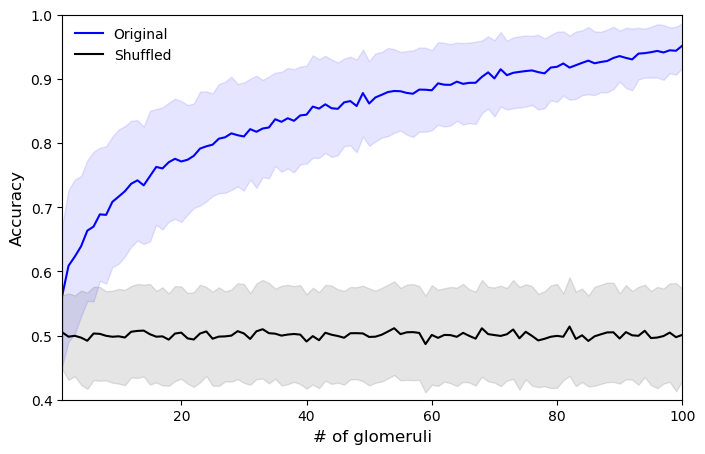

In [5]:
figure(figsize=(8,5))
cols = {0:[0,0,1],1:[0,0,0]}
h = []
for shuf in [1,0]:
    mm = perf_mean[:, shuf]
    ss = perf_std[:,  shuf]
    fill_between(sizes, mm - ss, mm + ss, color = cols[shuf] + [0.1])
    h.append(plot(sizes, mm, color=cols[shuf])[0])
ylim(0.4,1)
xlim(sizes[0], sizes[-1])
xlabel("# of glomeruli", fontsize=12)
ylabel("Accuracy",fontsize=12)
file_name = f"decoding_ppi_conc{which_conc}.pdf"
legend(h[::-1], ["Original", "Shuffled"], frameon=False)
savefig(file_name,bbox_inches="tight")
print(f"Wrote {file_name}")